# Variational Autoencoder

In [1]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, SubsetRandomSampler
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load pallets library from project root
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

from pallets import (
    images as I,
    datasets as DS,
    models as M,
    logging as L
)


# Settings

In [ ]:
SAVE_NAME = 'vae'

In [ ]:
USE_GPU = True
LOG_LEVEL = 'INFO'
LABELS_FILE = 'pallets_labels.json'

TEST_SIZE = 1000
EPOCHS = 50
LR = 1e-03
BATCH_SIZE = 32

In [3]:
# To GPU, or not to GPU
device = M.get_device(require_gpu=USE_GPU)

# Logging
L.init_logger(level=LOG_LEVEL, notebook=True)


<Logger pallets (INFO)>

# Dataset

In [4]:
all_colors = I.get_punk_colors()
mapper = DS.ColorOneHotMapper(all_colors)
dataset = DS.OneHotCPunksDataset(
    mapper, labels_file=LABELS_FILE, test_size=TEST_SIZE
)

# Uncomment to put entire dataset in GPU RAM
# dataset = DS.FastOneHotCPunksDataset(
#     device, mapper, labels_file=LABELS_FILE, test_size=TEST_SIZE
# )

INFO | loading punk images
INFO | - image 0
INFO | - image 1000
INFO | - image 2000
INFO | - image 3000
INFO | - image 4000
INFO | - image 5000
INFO | - image 6000
INFO | - image 7000
INFO | - image 8000
INFO | - image 9000
INFO | punk images complete
INFO | loading punk labels: ../../cpunks-10k/cpunks/data/punks.json


In [ ]:
train_sampler = SubsetRandomSampler(dataset.train_idx)
test_sampler = SubsetRandomSampler(dataset.test_idx)

train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, sampler=train_sampler)
test_loader = DataLoader(dataset, batch_size=BATCH_SIZE, sampler=test_sampler)

# Training

In [6]:
input_dim = 222
hidden_dims = (64, 32)
latent_dim = 20

model = M.vae.VAE(input_dim, hidden_dims, latent_dim)
criterion = M.vae.Loss()

train_losses, test_losses = M.vae.train(
    device, model, criterion, train_loader, test_loader,
    learn_rate=LR, epochs=EPOCHS
)

M.save(SAVE_NAME, model, train_losses, test_losses)

INFO | model: pallets.models.vae.VAE
INFO | criterion: pallets.models.vae.Loss
INFO | learn rate: 0.001
INFO | epochs: 50
INFO | epoch 1 (  0%) loss: 511519.656250
INFO | epoch 1 ( 35%) loss: 38855.819495
INFO | epoch 1 ( 70%) loss: 21744.505008
INFO | epoch 1 (100%) loss: 16595.956616
INFO | epoch 1 (test) loss: 3770.168264
INFO | epoch 2 (  0%) loss: 3568.685303
INFO | epoch 2 ( 35%) loss: 3827.919574
INFO | epoch 2 ( 70%) loss: 3830.832894
INFO | epoch 2 (100%) loss: 3812.020109
INFO | epoch 2 (test) loss: 3743.992252
INFO | epoch 3 (  0%) loss: 3987.702881
INFO | epoch 3 ( 35%) loss: 3813.149726
INFO | epoch 3 ( 70%) loss: 3808.768013
INFO | epoch 3 (100%) loss: 3794.421789
INFO | epoch 3 (test) loss: 3727.764042
INFO | epoch 4 (  0%) loss: 3760.359375
INFO | epoch 4 ( 35%) loss: 3783.482637
INFO | epoch 4 ( 70%) loss: 3781.303460
INFO | epoch 4 (100%) loss: 3780.405223
INFO | epoch 4 (test) loss: 3716.228521
INFO | epoch 5 (  0%) loss: 3726.244629
INFO | epoch 5 ( 35%) loss: 3781.

# Results

In [9]:
# Generate new image

z = torch.randn(1, latent_dim).to(device)
with torch.no_grad():
    model.eval()
    generated_image = model.decode(z)
    print(generated_image.shape)


decoded_one_hot = generated_image[0]
print(decoded_one_hot.shape)


torch.Size([1, 222, 24, 24])
torch.Size([222, 24, 24])


torch.Size([4, 24, 24])


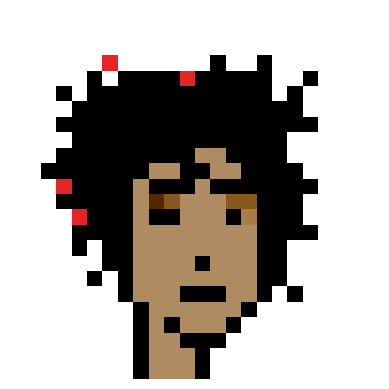

In [10]:
decoded = DS.one_hot_to_rgba(decoded_one_hot, mapper)
print(decoded.shape)

plt.imshow(transforms.functional.to_pil_image(decoded))
plt.axis('off')
plt.show()


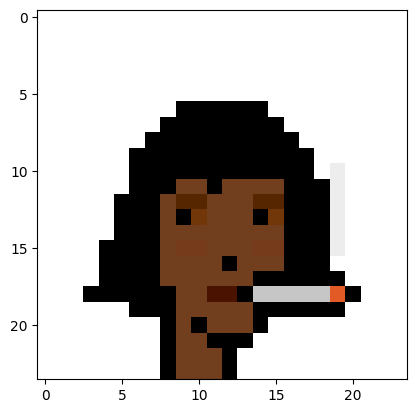

In [13]:
punk = I.get_punk_tensor(1000)

plt.imshow(transforms.functional.to_pil_image(punk))
plt.show()



torch.Size([1, 222, 24, 24])


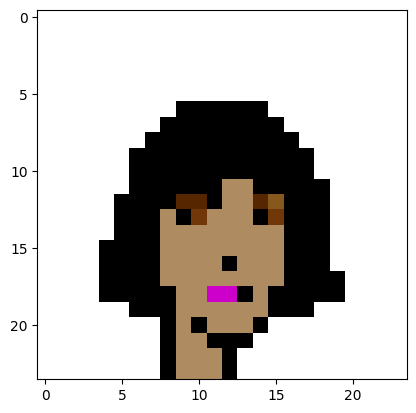

In [14]:
punk = I.get_punk_tensor(1000)

p = DS.rgba_to_one_hot(punk, mapper)
p = p.unsqueeze(0)
p = p.to(device)

model.eval()
with torch.no_grad():
    reconstructed, mu, logcar = model.forward(p)
    print(reconstructed.shape)

recon_punk = reconstructed[0].cpu()
recon_punk = DS.one_hot_to_rgba(recon_punk, mapper)
plt.imshow(transforms.functional.to_pil_image(recon_punk.cpu()))
plt.show()


## Losses

<function matplotlib.pyplot.show(close=None, block=None)>

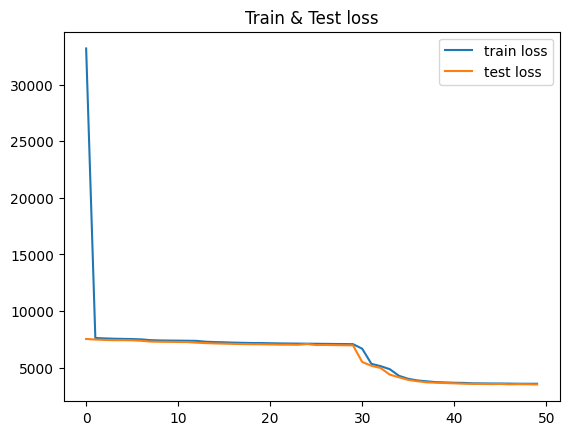

: 

In [15]:
plt.title("Train & Test loss")
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show


In [11]:
train_losses


[33191.91323224873,
 7624.040217839234,
 7588.843578582115,
 7560.810446015486,
 7545.590161911985,
 7531.705634800255,
 7502.278373555934,
 7431.786218954317,
 7408.873526498781,
 7397.046342565658,
 7390.648036226313,
 7380.435526097074,
 7369.1107550005545,
 7295.20715418606,
 7263.5064329323195,
 7243.850206740359,
 7214.22126542761,
 7197.9019623884915,
 7181.206800961325,
 7177.820918089955,
 7160.897902035544,
 7146.801003746952,
 7137.711601960744,
 7129.2423316468585,
 7121.553968930075,
 7113.778043273493,
 7104.8892675088655,
 7095.774508428912,
 7090.120427124889,
 7079.318630786653,
 6676.732429233849,
 5341.260890230219,
 5137.365213164201,
 4867.514385250443,
 4282.818299205591,
 4021.344937804743,
 3875.6268219643453,
 3797.3453014184397,
 3727.7235029504654,
 3699.963712435242,
 3671.9243244144086,
 3658.316827868739,
 3621.449621538744,
 3615.4192836031,
 3605.87580146519,
 3604.188468121468,
 3596.5728987024186,
 3585.0834203408963,
 3583.204350248296,
 3582.47210433

In [12]:
test_losses


[7540.336528778076,
 7487.984504699707,
 7455.5280838012695,
 7432.457042694092,
 7433.112575531006,
 7418.477344512939,
 7377.407791137695,
 7308.87043762207,
 7292.676979064941,
 7282.385120391846,
 7273.78108215332,
 7266.417289733887,
 7213.334403991699,
 7170.894355773926,
 7144.010303497314,
 7124.299171447754,
 7103.8897132873535,
 7090.9731369018555,
 7075.815807342529,
 7071.427341461182,
 7055.256813049316,
 7036.650146484375,
 7035.079273223877,
 7022.235614776611,
 7088.085800170898,
 7001.8662185668945,
 7010.239833831787,
 6995.018993377686,
 6983.243816375732,
 6971.419692993164,
 5503.704029083252,
 5173.469833374023,
 4973.774524688721,
 4387.340572357178,
 4151.392230987549,
 3925.46773147583,
 3803.7941703796387,
 3711.988573074341,
 3673.478343963623,
 3645.124500274658,
 3620.3674812316895,
 3587.2888984680176,
 3570.572093963623,
 3568.5691299438477,
 3551.603748321533,
 3566.3319911956787,
 3533.1274375915527,
 3548.168218612671,
 3537.379665374756,
 3519.1485729